# Money Distribution

Run a sample ABM model provided by David Masad & Jacqueline Kazil in [Mesa: An Agent-Based Modeling Framework](http://conference.scipy.org/proceedings/scipy2015/pdfs/jacqueline_kazil.pdf).

In [4]:
%matplotlib inline

In [5]:
import random
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector

class MoneyModel(Model):
	"""A model with some number of agents."""
	def __init__(self, N, width, height, torus):
		self.grid = MultiGrid(height, width, torus)
		self.num_agents = N
		self.schedule = RandomActivation(self)
		self.create_agents()
		ar = {"Wealth": lambda a: a.wealth}
		self.dc = DataCollector(agent_reporters=ar)

	def create_agents(self):
		"""Method to create all the agents."""
		for i in range(self.num_agents):
			a = MoneyAgent(i)
			self.schedule.add(a)
			x = random.randrange(self.grid.width)
			y = random.randrange(self.grid.width)
			self.grid.place_agent(a, (x, y))

	def step(self):
		self.dc.collect(self)
		self.schedule.step()

	def run_model(self, steps):
		for _ in range(steps):
			self.step()

class MoneyAgent(Agent):
	""" An agent with fixed initial wealth."""
	def __init__(self, unique_id):
		self.unique_id = unique_id
		self.wealth = 1

	def move(self, model):
		"""Take a random step."""
		grid = model.grid
		x, y = self.pos
		possible_steps = grid.get_neighborhood(pos=[x, y], moore=True, include_center=True)
		choice = random.choice(possible_steps)
		grid.move_agent(self, choice)

	def give_money(self, model):
		grid = model.grid
		pos = [self.pos]
		others = grid.get_cell_list_contents(pos)
		if len(others) > 1:
			other = random.choice(others)
			other.wealth += 1
			self.wealth -= 1

	def step(self, model):
		self.move(model)
		if self.wealth > 0:
			self.give_money(model)


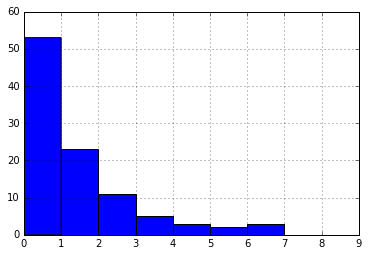

In [6]:
model = MoneyModel(100, 10, 10, True)
model.run_model(1000)
wealth_history = model.dc.get_agent_vars_dataframe()
wealth_history.reset_index(inplace=True)
wealth_history[wealth_history.Step==999].Wealth.hist(bins=range(10))